# Homework2: Exploratory Data Analysis and One Sample Tests

1. Simulate 10,000 observations of an exponential distribution with paramenter equal to one

a. Plot a histogram of the results. Use an appropriate number of breaks in the graph

b. Draw a QQ-Plot against the Standard Normal Distribution. Repeat a and b for the sum of 2, 5, and 10 exponentials with parameter 1


In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

a.

[Text(0.5, 1.0, 'histogram of the results')]

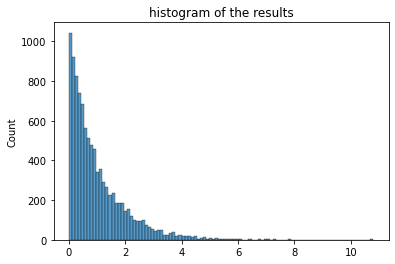

In [2]:
data = np.random.exponential(1, 10000)
sns.histplot(data, bins = 100).set(title = 'histogram of the results')

b.

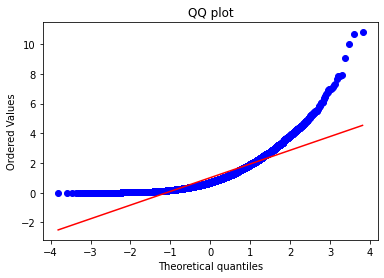

In [3]:
stats.probplot(data, dist="norm", plot = plt)
plt.title('QQ plot')
plt.show()


[Text(0.5, 1.0, 'histogram of the the sum of 2 exponentials with parameter 1')]

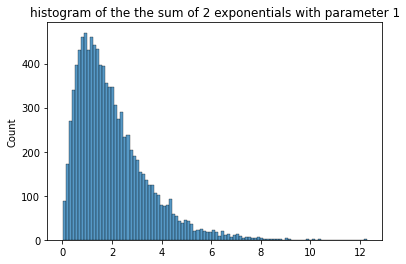

In [4]:
# Repeat a and b for the sum of 2, 5, and 10 exponentials with parameter 1

data_2 = np.zeros(10000)
data_5 = np.zeros(10000)
data_10 = np.zeros(10000)
for i in range(2):
    data_2 += np.random.exponential(1, 10000)
for i in range(5):
    data_5 += np.random.exponential(1, 10000)
for i in range(10):
    data_10 += np.random.exponential(1, 10000)


sns.histplot(data_2, bins = 100).set(title = 'histogram of the the sum of 2 exponentials with parameter 1')

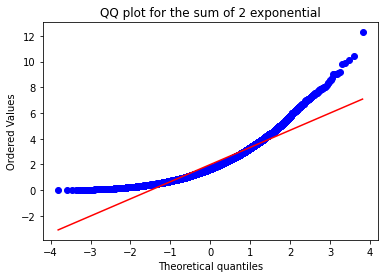

In [5]:
stats.probplot(data_2, dist="norm", plot = plt)
plt.title('QQ plot for the sum of 2 exponential')
plt.show()

[Text(0.5, 1.0, 'histogram of the the sum of 5 exponentials with parameter 1')]

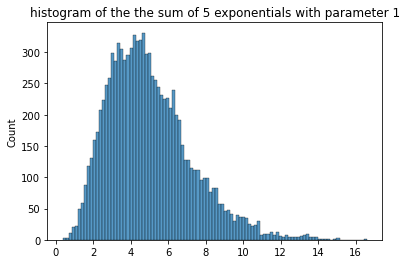

In [6]:
sns.histplot(data_5, bins = 100).set(title = 'histogram of the the sum of 5 exponentials with parameter 1')

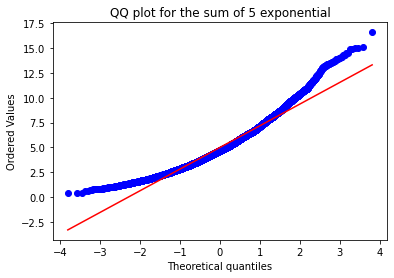

In [7]:
stats.probplot(data_5, dist="norm", plot = plt)
plt.title('QQ plot for the sum of 5 exponential')
plt.show()

[Text(0.5, 1.0, 'histogram of the the sum of 10 exponentials with parameter 1')]

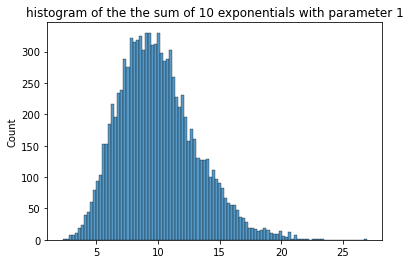

In [8]:
sns.histplot(data_10, bins = 100).set(title = 'histogram of the the sum of 10 exponentials with parameter 1')

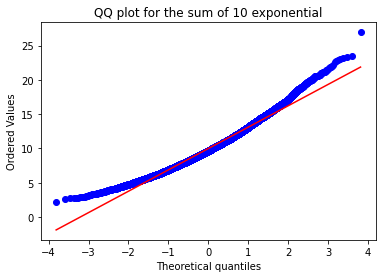

In [9]:
stats.probplot(data_10, dist="norm", plot = plt)
plt.title('QQ plot for the sum of 10 exponential')
plt.show()

***
2. The attached file contains the daily returns(in percentage points) of the New York Stock Exchange between February 2, 1984, and December 31, 1991.

a. Plot a histogram of the returns

b. draw a QQ-plot of the observed returns against the standard normal distribution

c. comment on the shape of the graph

d. what happened when the lowest daily return was observed


a. 

[Text(0.5, 1.0, 'histogram of the returns')]

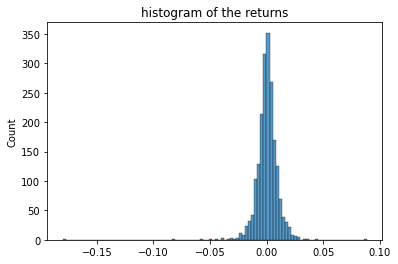

In [10]:
nyse = np.genfromtxt('NYSE.csv', delimiter=",")[1:]
sns.histplot(nyse, bins = 100).set(title = 'histogram of the returns')

b.

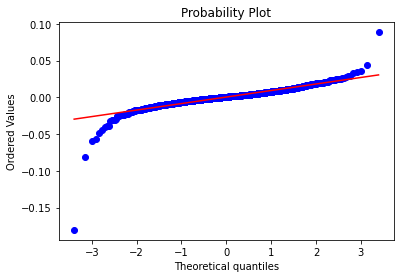

In [11]:
stats.probplot(nyse, dist="norm", plot = plt)
plt.show()


c. 
the daily return is approximately normal from -2 quantile to 2 quantiles, but the distribution of daily return has a fatter right tail and thinner left tail

d. 
stock market crash of 1987
the lowest daily return was observed on October 19, 1987, a day known as “Black Monday,” when the Dow Jones Industrial Average dropped 22.6 percent.

***

3. In a study in nuclear fuel waste management, researchers discovered hat when oxygen is inserted in molten salt at a sparging rate of $3.33 \cdot 10^{-6}$ that the true mean bubble rising velocity is $\mu = 0.338$. In a routine monitoring of the process, inspectors measured the bubble rising velocity at 25 different points in time. The data is given in the table below.


a. Conduct a test of hypothesis to determine if the true rising velocity for a population from which the sample is selected is $\mu = 0.338$. Use $\alpha = 0.10$

b. Do you think it is possible the actual mean $\mu$ could be 0.280

c. Based on the test results of part a, do yoou believe that the data in the table were generated at the sparging rate? Explain.


***
a. 

In [12]:
mu = 0.338
observation = np.array([0.275, 0.261, 0.209, 0.266, 0.265,
                       0.312, 0.285, 0.317, 0.229, 0.251, 
                       0.256, 0.339, 0.213, 0.178, 0.217,
                       0.307, 0.264, 0.319, 0.298, 0.169,
                       0.342, 0.270, 0.262, 0.228, 0.220])
statistics, p_value = stats.ttest_1samp(observation, popmean = mu)
print('test statistics: {}, p-value: {}'.format(statistics, p_value))

test statistics: -8.129995784562107, p-value: 2.36981738212038e-08


$p-value= 2.36981738212038*10^{-8} < \alpha = 0.1$. Therefore, we reject the null hypothesis that the true rising velocity for a population from which the sample is selected is $\mu = 0.338$

b. 

In [13]:
mu2 = 0.280
statistics_2, p_value_2 = stats.ttest_1samp(observation, popmean = mu2)
print('test statistics 2: {}, p-value 2: {}'.format(statistics_2, p_value_2))

test statistics 2: -1.9189874138481682, p-value 2: 0.06695391521384111


if $\alpha$ = 0.1, we can reject the null hypothesis, then the actual mean is not 0.280

It is possible that the actual mean $\mu$ could be 0.280, depending on $\alpha$ we choose. The p-value in this case equals 0.0669539, if $\alpha$ we choose $< 0.0669539$, then we cannot reject the null hypothesis and believe it is possible that the actual mean could be 0.280. If $\alpha$ we choose $> 0.0669539$, then we can reject the null hypothesis.


c.
I do not believe that the data in the table were generated at the sparging rate. Since the $p-value= 2.36981738212038*10^{-8} < \alpha = 0.1$ 

we reject the hypothsis that the data is generated under the null distribution where $\mu = 0.338$ that corresponds to the sparging rate. it is therefore unlikely that the data were generated at the sparging rate.

***
4. In a study of an anti-aging skin cream, 33 middle aged women used it for 22 weeks. At the end of the experiment the skin of the subjects was examined and judged to show improvement(I) or no improvement(N). The results are in the table below.

a. Do the data provide enough evidence to conclude that the cream improved the skin of more than 60% of the women?

b. Find and interpret the p-value of the test.


***
a. 
$H_0: p \leq 0.6$, where  $p = \frac{number of I}{33}$
$$z = \frac{\hat{p}-p}{\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}}$$

In [17]:
skin_evaluation = ['I','I','N','I','N','N','I','I','I','I','I',
                   'N','I','I','I','N','I','I','I','N','I','N',
                   'I','I','I','I','I','N','I','I','N','I','I']

p_hat = skin_evaluation.count('I')/33
p = 0.6
n = 33
z = (p_hat-p)/np.sqrt(p_hat*(1-p_hat)/n)
z_crit = stats.t.ppf(q = 0.95, df = n-1)
print("Critical value for t two tailed, alpha = 0.05:",z_crit)
print("test statistic = {}<{}".format(z, z_crit))



Critical value for t two tailed, alpha = 0.05: 1.6938887423906548
test statistic = 1.6416455159382008<1.6938887423906548


The test statistic = 1.6416 is smaller than the $\alpha = 0.5$ critical value 1.6939, so we fail to reject $H_0$. Therefore, the data does not provides us with enough evidence to conclude that the cream improved the skin of more than 60% of the women.

b. 

In [15]:
p_value = 1-stats.norm.cdf(z)
print("p-value:",p_value)  

p-value: 0.05033174453254241


The probability of achieving a test statistic as or more extream than 1.4924 under $H_0$ is 0.0681 >0.05. 
Therefore, the data does not provides us with enough evidence to reject $H_0$ and conclude that the cream improved the skin of more than 60% of the women.

***
5. the sign test
The one-sample sign test is a non parametric hypothesis test first used by John Arbuthnot, a Scottish physician, in 1710. Sign test is used to test the null hypothesis that the median of a distribution is equal to some hypothesized value. The test is based on the direction or the data are recorded as plus and minus sign rather than numerical magnitude, hence it is called sign test.

use the sign test to consider the null hypothesis that the population median is equal to zero ($H_0 :\eta =0$ ) in the context of Darwin's experiment.

a. what is the test statistic?

b. what is the reference distribution?

c. what is the p-value for the Darwin's data?

d. what would you say in light of the result in c and of the p-vlaue in the t-test?


***
a. 

the test statistic W is the number of pairs for which $x_i − y_i > 0$, where $x$ is the dataset of cross-fertilized plant and $y$ is the dataset of self-fertilized plan. test statistic = 13 in Darwin's case.

b. 

Assume that $H_0$ is true, then the reference distribution of W follows a binomial distribution 

$$W ～ binomial(m, 0.5)$$
$$\mathbb{P}(W = k)= \binom{15}{k}(\frac{1}{2})^{15}$$


c.
$$\mathbb{P}_{H_0}(W \geq 13) = \mathbb{P}_{H_0}(W =13) + \mathbb{P}_{H_0}(W =14) + \mathbb{P}_{H_0}(W =15) $$

$$= \binom{15}{13}(\frac{1}{2})^{15} + \binom{15}{14}(\frac{1}{2})^{15} + \binom{15}{15}(\frac{1}{2})^{15}$$

In [16]:
import math
cross = np.array([23.500, 12.000, 21.000, 22.000, 19.124, 21.500, 22.125, 20.375, 18.250, 21.625, 23.250, 
                  21.000, 22.125, 23.000, 12.000])
self = np.array([17.375, 20.375, 20.000, 20.000, 18.375, 18.625, 18.625, 15.250, 16.500,18.000,16.250, 
                 18.000, 12.750, 15.500, 18.000])
s = np.sum((cross-self) >= 0, axis=0)
p_value = (math.comb(15, 13) + math.comb(15, 14) + math.comb(15, 15))/(2**15)
print("Test statistics in Darwin's data is: {}".format(s))
print("The p-value for Darwin's data is: {}".format(p_value))

Test statistics in Darwin's data is: 13
The p-value for Darwin's data is: 0.003692626953125


d.

The p-value for Darwin's data is: 0.003692626953125. This means that the probability of achieving a test statistics W as or more extreme than 13 under the $H_0$(cross-fertilized plants have the same height with self-fertilized plants) is 0.0037 < 0.5. 

Therefore, we can reject our null hypothesis and conclude that cross-fertilized plants in general are taller than self-fertilized plants. median is not equal to 0.